In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("Stores.csv")

In [9]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [10]:
df.shape

(896, 5)

In [11]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [15]:
df.corr()['Store_Sales'].sort_values()

Daily_Customer_Count    0.008629
Store ID                0.071486
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

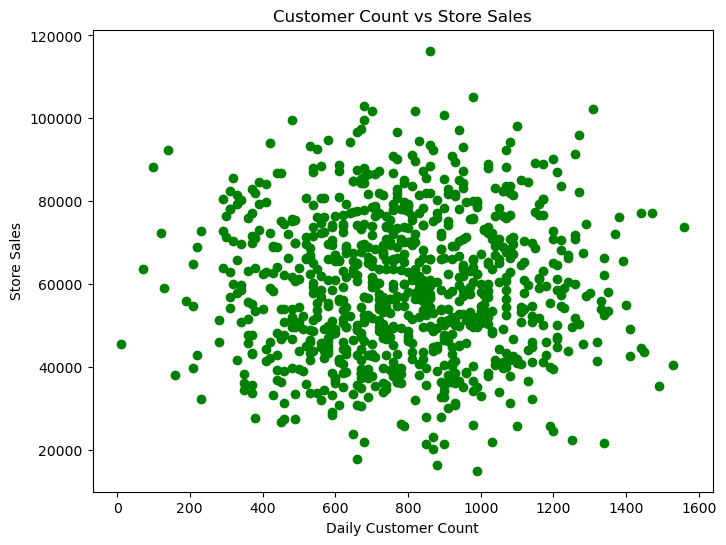

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['Daily_Customer_Count'], df['Store_Sales'], color='green')
plt.title("Customer Count vs Store Sales")
plt.xlabel("Daily Customer Count")
plt.ylabel("Store Sales")
plt.show()

<Figure size 800x600 with 0 Axes>

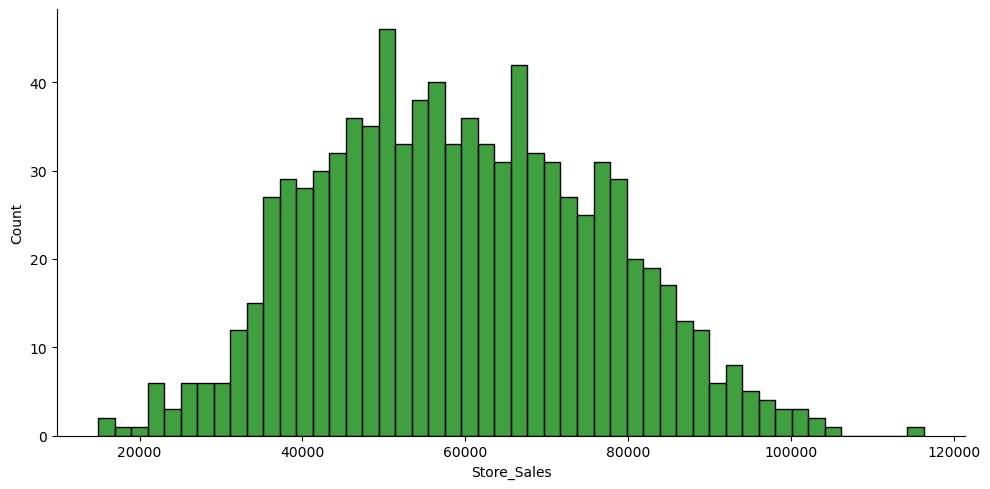

In [24]:
plt.figure(figsize=(8,6))
sns.displot(data=df, x = 'Store_Sales', bins=50, color='green', aspect=2)

In [25]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [29]:
X = df.drop('Store_Sales', axis=1)
y = df['Store_Sales']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [58]:
def results(prediction_values):
    print("The mean absolute error is {}".format(mean_absolute_error(y_test, prediction_values)))
    print("The root mean squared error is {}".format(np.sqrt(mean_squared_error(y_test, prediction_values))))

In [52]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model = LinearRegression()
linear_model.fit(scaled_X_train, y_train)
linear_predictions = linear_model.predict(scaled_X_test)
results(linear_predictions)

The mean absolute error is 14216.949066847837
The root mean squared error is 17176.807503041513


In [60]:
from sklearn.svm import SVR 
svr_model = SVR()
svr_model.fit(scaled_X_train, y_train)
svr_predictions = svr_model.predict(scaled_X_test)
results(svr_predictions)

The mean absolute error is 14323.244157170648
The root mean squared error is 17385.550056510863


In [62]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(scaled_X_train, y_train)
random_model_predictions = random_model.predict(scaled_X_test)
results(random_model_predictions)

The mean absolute error is 15014.285873605948
The root mean squared error is 18095.71761153434
